In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_28836/1749505576.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/media/ahmed/code/python_envs/anaconda3/lib/python3.9/importlib/_bootstrap.py": 1649142426.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/importlib/_bootstrap_external.py": 1649142426.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/codecs.py": 1649142425.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/encodings/aliases.py": 1649142427.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/encodings/__init__.py": 1649142427.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/encodings/utf_8.py": 1649142427.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/encodings/latin_1.py": 1649142427.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/abc.py": 1649142425.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/io.py": 1649142425.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/stat.py": 1649142425.0, "/media/ahmed/code/python_envs/anaconda3/lib/python3.9/_collections_abc.py": 1649142425.0, "/media/ahmed/code/python_e

In [2]:
import random, os, sys
import shutil 
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import urllib


def init_session(RANDOM_SEED = 42):
    RANDOM_SEED = RANDOM_SEED
    np.random.seed(RANDOM_SEED)
    random.seed(RANDOM_SEED)
    import warnings
    warnings.filterwarnings('ignore')
init_session()

/media/ahmed/code/python_envs/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2



In [3]:
def DataFetcher(*, source):

    file_name = Path(source).name #housing.tgz
    compressed_path = Path(os.path.join("datasets", file_name))#datasets/housing.tgz
    compressed_dir = str(compressed_path).split(".")[-2]#datasets/housing

    if not compressed_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        urllib.request.urlretrieve(source, compressed_path)
        shutil.unpack_archive(compressed_path, os.path.join("datasets"))
    return pd.read_csv(os.path.join(compressed_dir, file_name.split(".")[-2] + ".csv"))

In [4]:
url = "https://github.com/ageron/data/raw/main/housing.tgz"
housing = DataFetcher(source= url)

In [5]:
type(housing)

pandas.core.frame.DataFrame

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


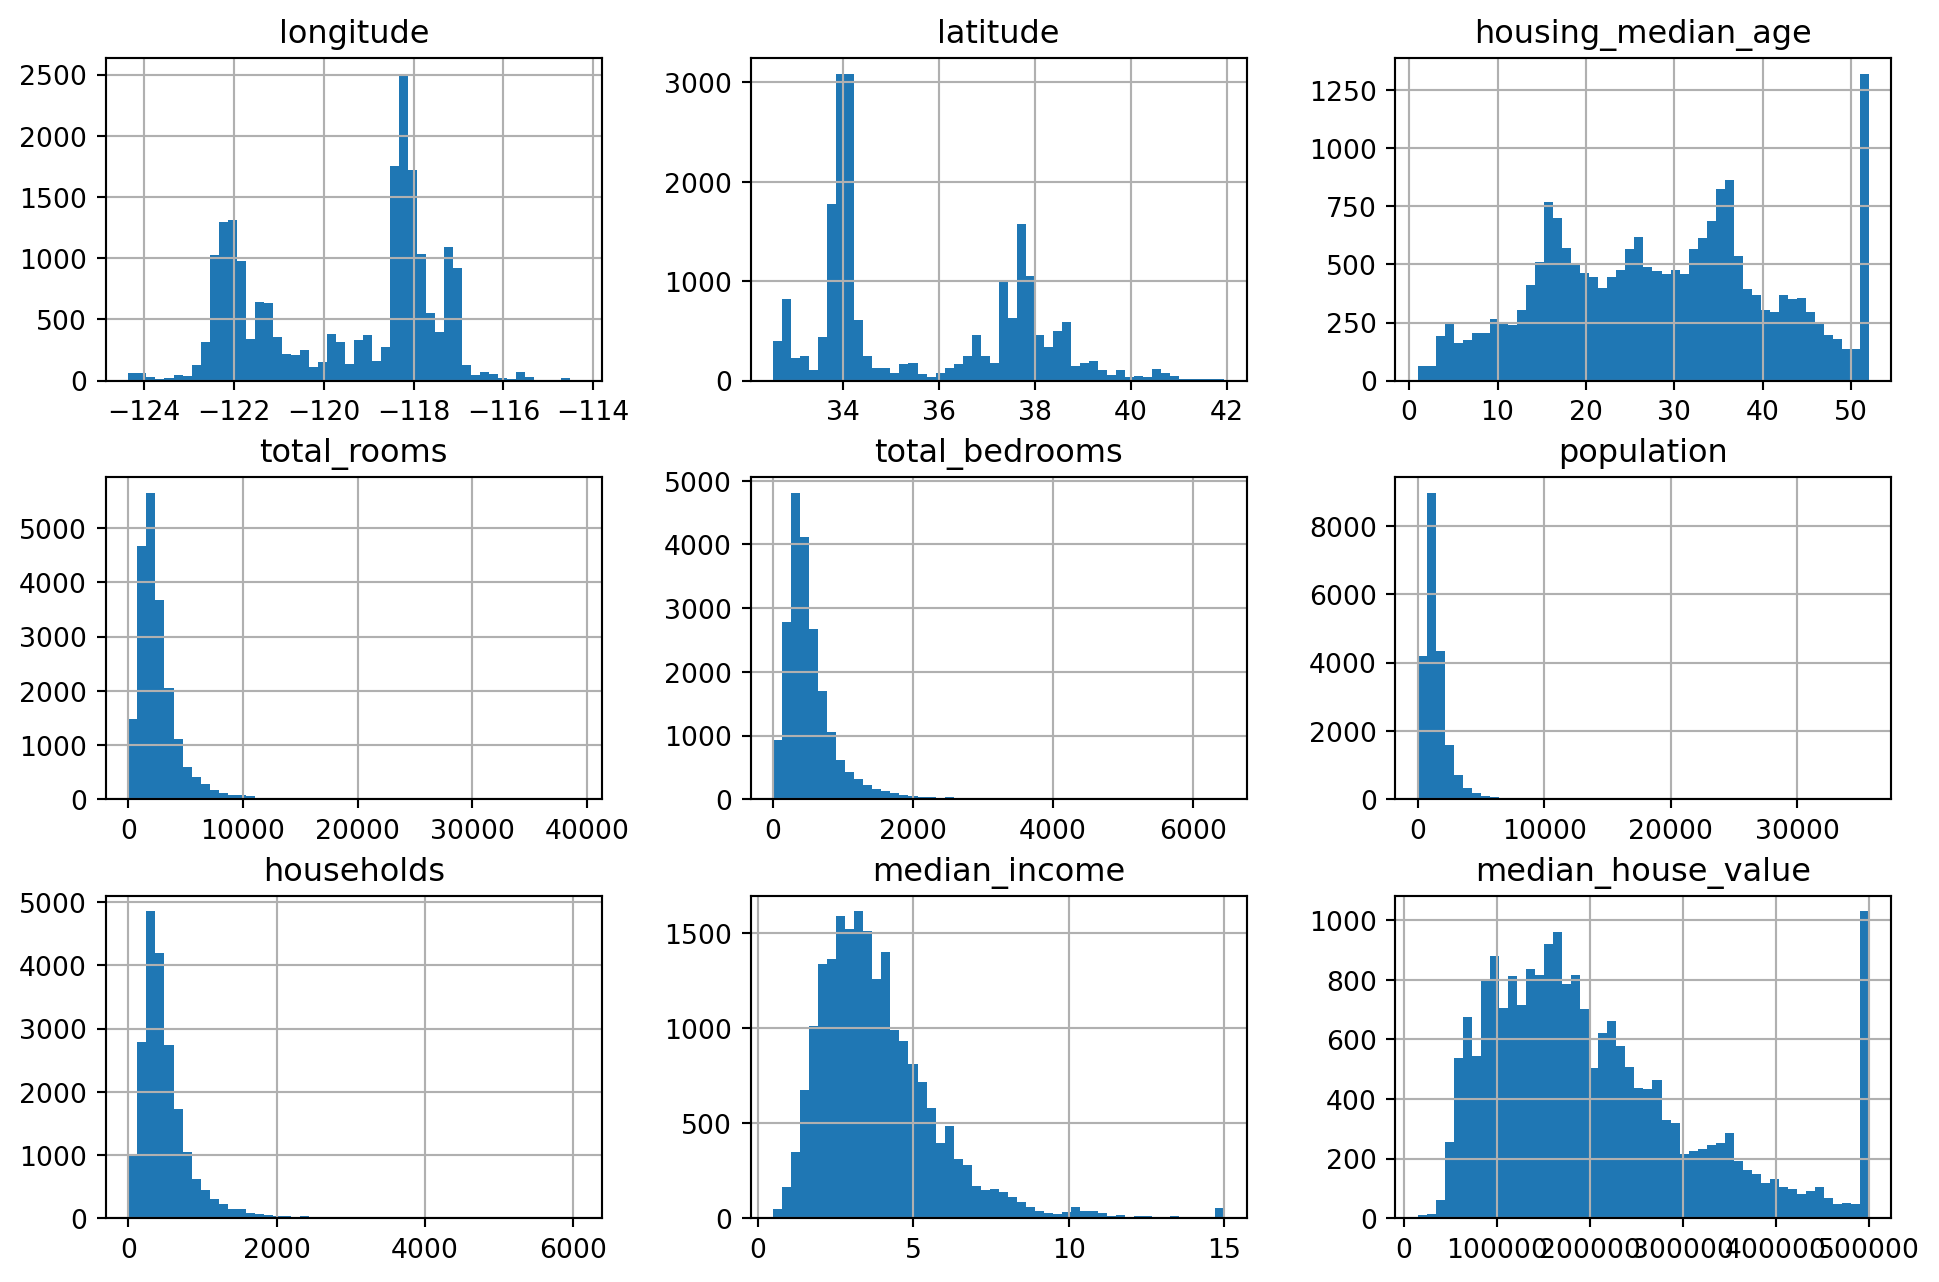

In [11]:
#| label: fig-hist
#| fig-cap: A histogram of the numerical features.
housing.hist(bins=50, figsize=(12,8))
plt.show()